# Vehicle Dtection Via  Traditional Computer Vision

## Project Steps:
        1.feature extraction
        2.train classifier
        3.sliding windows
        4.false positives

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import utils
import random
%matplotlib inline

## 1.Feature Extraction 

### Explore Data
This dataset is a combination of the 'GTI vehicle image database', the 'KITTI vision benchmark suite', and examples extracted from the project video itself.

In [3]:
path_vehic = './data/vehicles/'
path_nonvehic = './data/non-vehicles/'
ls_vehic = ['GTI_Far', 'GTI_Left', 'GTI_MiddleClose', 'GTI_Right', 'KITTI_extracted']
ls_nonvehic = ['GTI', 'Extras']

In [4]:
vehicles = []
non_vehicles = []
for folder in ls_vehic:
    img_folder = path_vehic + folder
    img_paths = glob.glob(img_folder + '/*.png')
    vehicles = vehicles + img_paths
for folder in ls_nonvehic:
    img_folder = path_nonvehic + folder
    img_paths = glob.glob(img_folder + '/*.png')
    non_vehicles = non_vehicles + img_paths
print('Number of vehicles:', len(vehicles))
print('Number of non-vehicles:', len(non_vehicles))

Number of vehicles: 8792
Number of non-vehicles: 8968


### Display Examples of Data

Shape of examples: (16, 64, 64, 3)


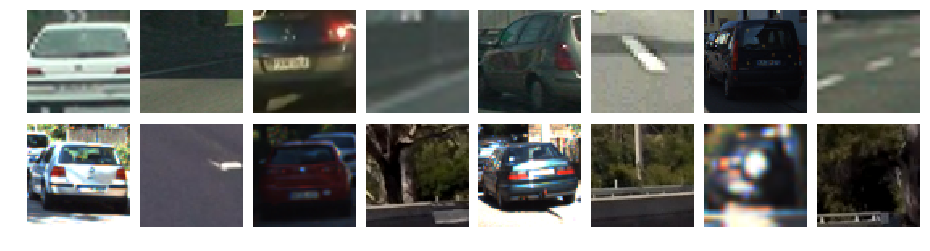

In [5]:
'''
matplotlib.image.imread will read .png in on a scale of 0 to 1, but cv2.imread() will scale them from 0 to 255.
'''
examples = []
for i in range(8):
    rand_num = random.randint(0,1000)
    idx = i*1000 + rand_num
    examples.append(cv2.cvtColor(cv2.imread(vehicles[idx]), cv2.COLOR_BGR2RGB))
    examples.append(cv2.cvtColor(cv2.imread(non_vehicles[idx]), cv2.COLOR_BGR2RGB))
examples = np.asarray(examples)
print('Shape of examples:', examples.shape)
utils.display(examples, size=(2,8), fig_size=(16,4))

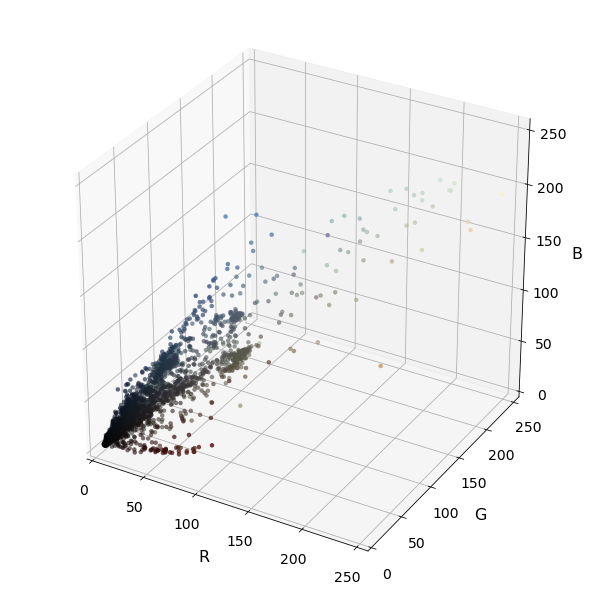

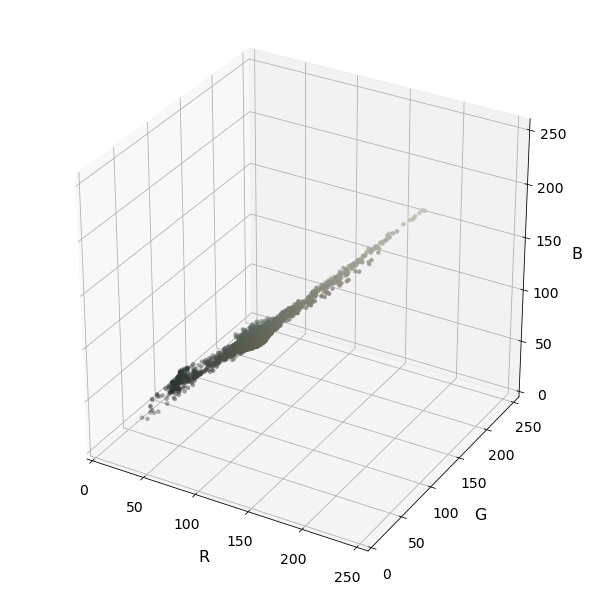

In [6]:
utils.plot3d(examples[6],examples[6]/255)
utils.plot3d(examples[7],examples[7]/255)

### Extract Color Features on Examples

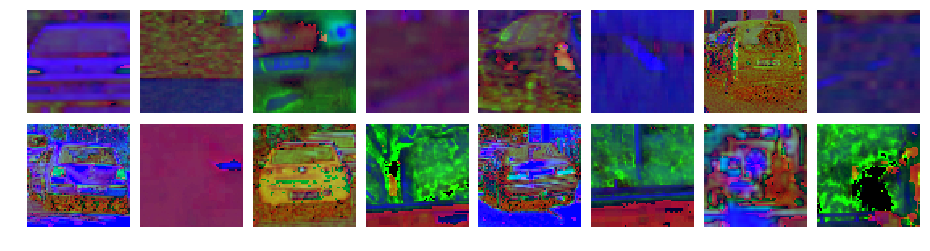

In [7]:
hsv_examples = []
for img in examples:
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv_examples.append(hsv)
utils.display(hsv_examples, size=(2,8), fig_size=(16,4))

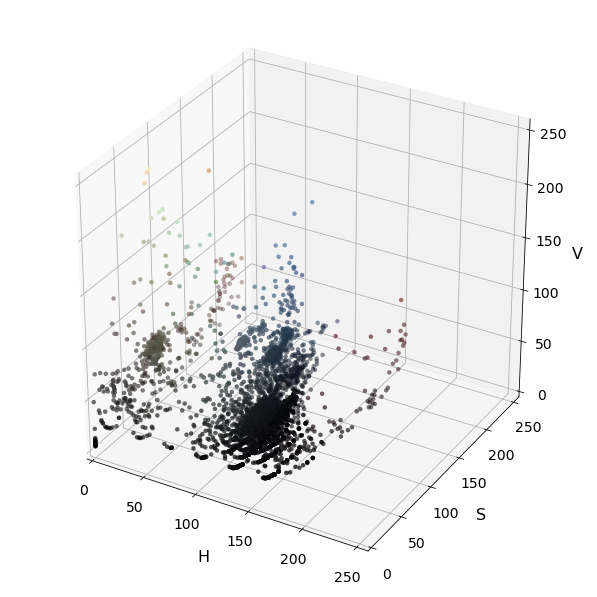

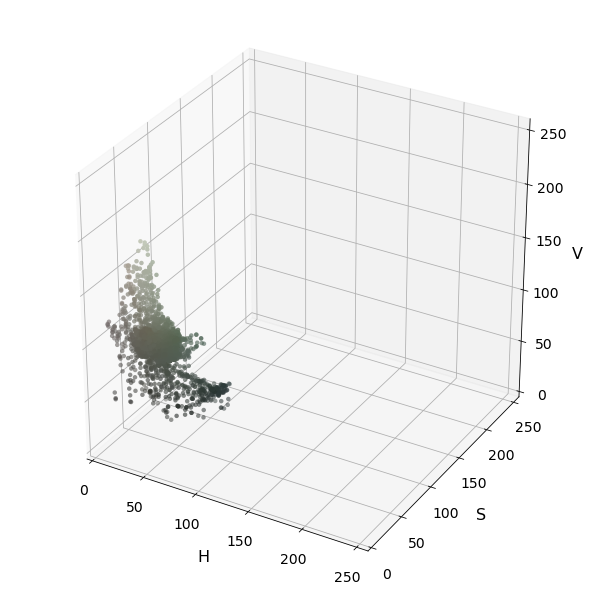

In [8]:
utils.plot3d(hsv_examples[6], examples[6]/255, axis_labels=list("HSV"))
utils.plot3d(hsv_examples[7], examples[7]/255, axis_labels=list("HSV"))

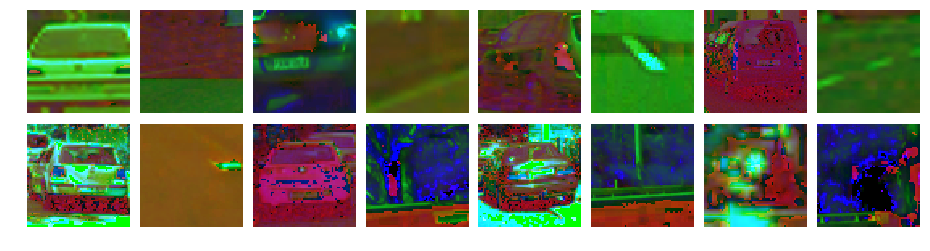

In [9]:
hls_examples = []
for img in examples:
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_examples.append(hls)
utils.display(hls_examples, size=(2,8), fig_size=(16,4))

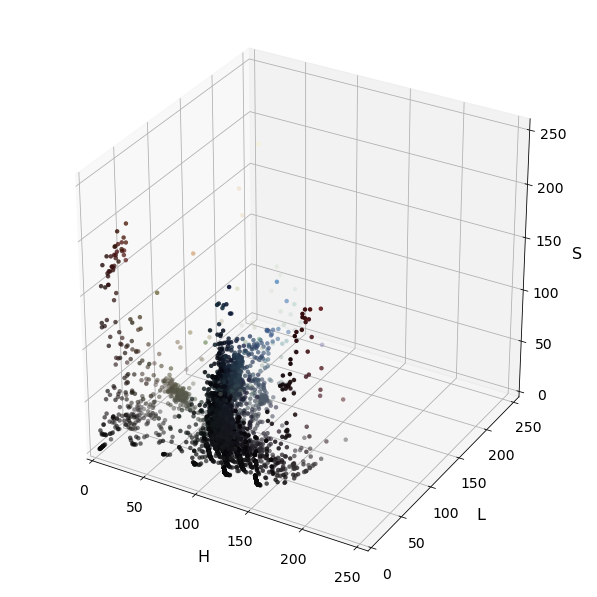

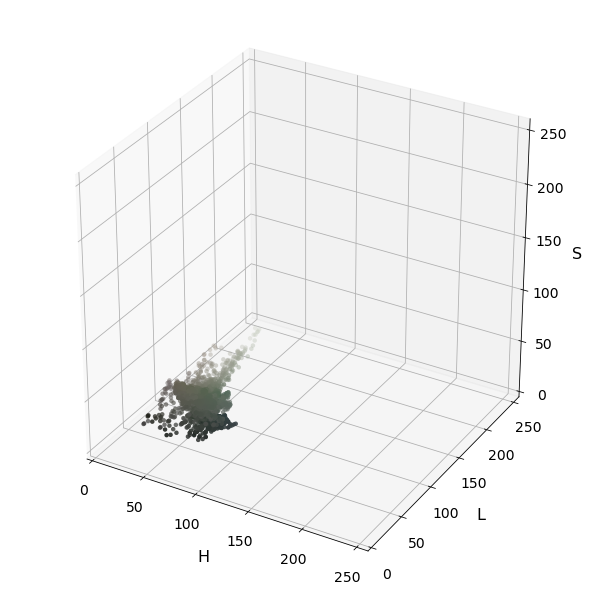

In [10]:
utils.plot3d(hls_examples[6], examples[6]/255, axis_labels=list("HLS"))
utils.plot3d(hls_examples[7], examples[7]/255, axis_labels=list("HLS"))

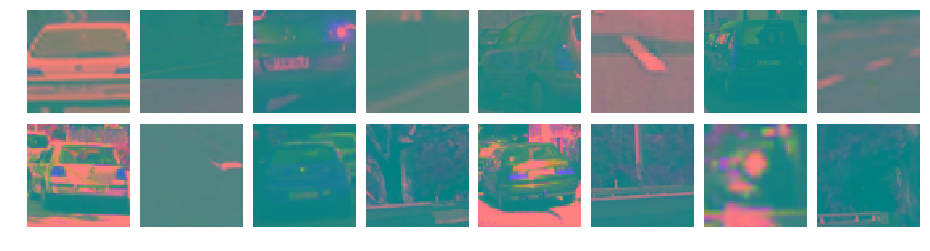

In [11]:
yuv_examples = []
for img in examples:
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    yuv_examples.append(yuv)
utils.display(yuv_examples, size=(2,8), fig_size=(16,4))

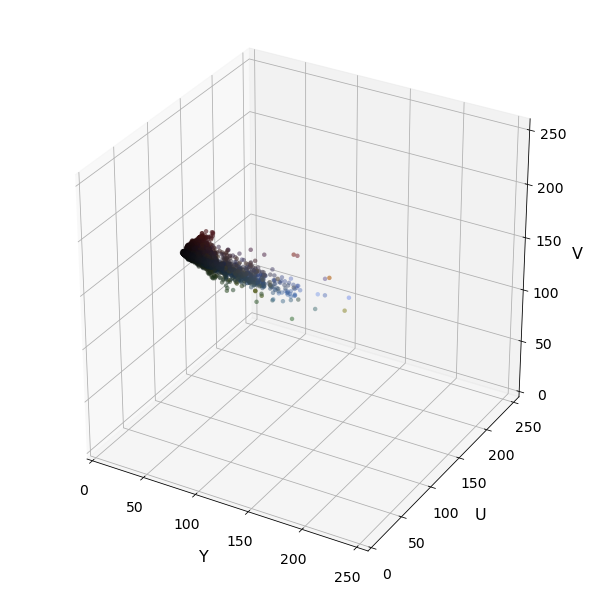

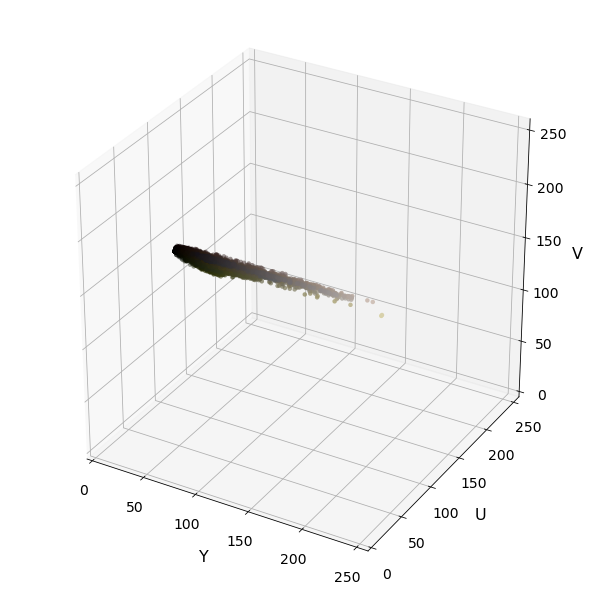

In [12]:
utils.plot3d(yuv_examples[10], examples[10]/255, axis_labels=list("YUV"))
utils.plot3d(yuv_examples[11], examples[11]/255, axis_labels=list("YUV"))

From the exploring above, it seems that the S(saturation) layer of an image can be useful as a feature.

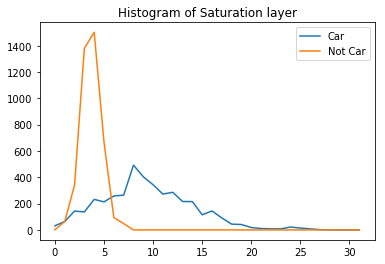

In [13]:
s_features6 = utils.get_s_features(examples[6])
plt.plot(s_features6)
s_features7 = utils.get_s_features(examples[7])
plt.plot(s_features7)
plt.legend(['Car', 'Not Car'], loc = 'upper right')
plt.title('Histogram of Saturation layer')

### Extract Grandient Features on Examples

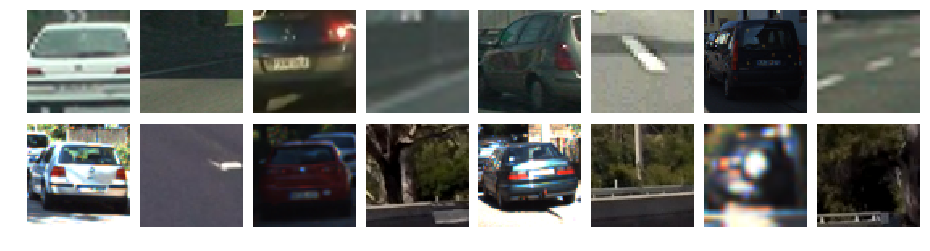

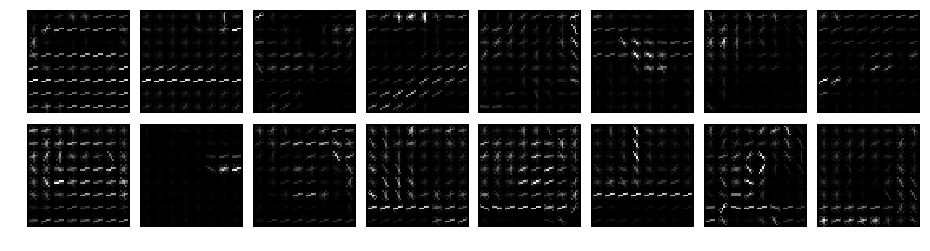

In [14]:
hog_examples = []
for example in examples:
    hog_features, hog_image = utils.get_hog_features(cv2.cvtColor(example, cv2.COLOR_RGB2GRAY), orient= 9, 
                                           pix_per_cell= 8, cell_per_block= 2, vis=True, feature_vec=True)
    hog_examples.append(hog_image)
utils.display(examples, size=(2,8), fig_size=(16,4))
utils.display(hog_examples, size=(2,8), fig_size=(16,4), cm='gray')

In [15]:
hog_features.shape

(1764,)

### Extract Image Features for Training

In [17]:
vehicles_feat = []
for path in vehicles:
    
    bgr = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_features = utils.extract_features(rgb, orient=9, pix_per_cell=8, cell_per_block=2)
    vehicles_feat.append(img_features)

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(32,) ()
(

In [15]:
vehicles_feat[0]

array([  7.00000000e+00,   1.06000000e+02,   4.68000000e+02,
         7.39000000e+02,   8.78000000e+02,   1.03600000e+03,
         2.40000000e+02,   1.24000000e+02,   1.05000000e+02,
         8.90000000e+01,   4.50000000e+01,   3.50000000e+01,
         3.00000000e+01,   2.30000000e+01,   1.60000000e+01,
         2.50000000e+01,   2.10000000e+01,   1.40000000e+01,
         1.80000000e+01,   1.10000000e+01,   2.80000000e+01,
         2.90000000e+01,   7.00000000e+00,   2.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.53020561e-03])

In [16]:
np.asarray(vehicles_feat).shape

(8792, 33)

## 2.Train Classifier

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler